In [3]:
from google.colab import files

uploaded = files.upload()

Saving attackdata.json to attackdata (1).json
Saving testdata.json to testdata (1).json
Saving testdata2.json to testdata2 (1).json
Saving testdata3.json to testdata3 (1).json
Saving testdata4.json to testdata4 (1).json
Saving testdata5.json to testdata5 (1).json
Saving testdata6.json to testdata6 (1).json
Saving testdata7.json to testdata7 (1).json
Saving testdata8.json to testdata8 (1).json
Saving testdata9.json to testdata9 (1).json
Saving testdata10.json to testdata10 (1).json


In [2]:
import numpy as np
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import torch.nn.functional as F
!pip install torchmetrics
from tokenizers import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
!pip install utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

###Preprocessing and encoding

In [4]:
import json

# Assuming your JSON file is named "data.json"
with open('testdata.json', 'r') as f:
    data = json.load(f)

dataset=data

with open('testdata2.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata3.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata4.json', 'r') as f:
    data = json.load(f)

dataset+=data

with open('testdata5.json', 'r') as f:
    data = json.load(f)

dataset+=data
# with open('testdata6.json', 'r') as f:
#     data = json.load(f)

# dataset+=data
with open('testdata7.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata8.json', 'r') as f:
    data = json.load(f)

dataset+=data
with open('testdata9.json', 'r') as f:
    data = json.load(f)

dataset+=data

In [ ]:
print(dataset[0])

[{'BlockNumber': 15625410, 'TxHash': '0xc5f8f3448ff023c313c35579cc7ae704eef6be113a2edf0226e1171571d41cee', 'CallList': [{'to': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'from': '0x5354f00292296518713a47777bb6d2b9712fe74a', 'value': '0.0', 'gas': '0.000000000000168362', 'input': '0x69277b67'}, [[{'to': '0xdd6bd08c29ff3ef8780bf6a10d8b620a93ac5705', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000108744', 'input': '0x69277b67'}, [{'to': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000035571', 'input': '0x0c8496cc'}, [{'to': '0x52ae12abe5d8bd778bd5397f99ca900624cfadd4', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000000000002861', 'input': '0xbb34534c42616e636f72466f726d756c61'}, {'to': '0xb1cd6e4153b2a390cf00a6556b0fc1458c4a5533', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.00000

In [5]:
print(len(dataset))
print(dataset[0:10])

def hex_to_float32(hex_value):
    max_value=1e6
    # Remove '0x' prefix if present
    hex_value = hex_value.replace('0x', '')

    if not hex_value:
        hex_value = '0'

    # Convert hexadecimal to decimal
    decimal_value = int(hex_value, 16)

    # Scale down large values
    if decimal_value >= max_value:
        decimal_value = decimal_value%max_value

    # Convert decimal to float32
    float32_value = np.float32(decimal_value)

    return float32_value

def preprocess(dataset):
  flat_dataset = [item for sublist in dataset for item in sublist]


  def store_calls(data):
    calllist=[]
    for cur in data:
      cur['CallList'][1]=cur['CallList'][1][0]
      calllist.append(cur['CallList'])

    return calllist
  print(len(flat_dataset))
  calls=store_calls(flat_dataset)
  print(len(calls))
  def unnest(nested_list, level=0):
      encoded_list = []

      for item in nested_list:
          if isinstance(item, list):
              nested_encoded = unnest(item, level + 1)
              encoded_list.extend(nested_encoded)
          else:
              encoded_list.append(hex_to_float32(item["to"]))
              encoded_list.append(hex_to_float32(item["from"]))
              encoded_list.append(float(item["value"]))
              encoded_list.append(float(item["gas"]))
              encoded_list.append(hex_to_float32(item["input"]))
              encoded_list.append(float(level))

      return encoded_list



  unnested_calls=[]
    # Assuming each sublist in input_list is a sequence
  for seq in calls:
    unnested_calls.append(unnest(seq,0))
  return unnested_calls

unnested_calls=preprocess(dataset)

print(unnested_calls[0:10])

1931
[[{'BlockNumber': 14442828, 'TxHash': '0xe1e615a33db7d8fc8b5a63d18259d530d9bdd345793e2fde5664ed30f7dd8130', 'CallList': [{'to': '0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 'from': '0x159d2c5a819d1944224c5694d729a24f8ad6ab1a', 'value': '0.0', 'gas': '0.000000000000215408', 'input': '0x993e1c42'}, [[{'to': '0x8407dc57739bcda7aa53ca6f12f82f9d51c2f21e', 'from': '0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 'value': '0.0', 'gas': '0.000000000000180348', 'input': '0x993e1c42'}, [{'to': '0x33e71e649abdc09f650ad44139674828a2075ad2', 'from': '0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 'value': '0.0', 'gas': '0.000000000000005215', 'input': '0x3579e67a'}, {'to': '0x33e71e649abdc09f650ad44139674828a2075ad2', 'from': '0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 'value': '0.0', 'gas': '0.00000000000000069', 'input': '0x393df8cb'}, {'to': '0x33e71e649abdc09f650ad44139674828a2075ad2', 'from': '0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 'value': '0.0', 'gas': '0.000000000000003205', 'input

In [ ]:
print(dataset[0])

[{'BlockNumber': 15625410, 'TxHash': '0xc5f8f3448ff023c313c35579cc7ae704eef6be113a2edf0226e1171571d41cee', 'CallList': [{'to': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'from': '0x5354f00292296518713a47777bb6d2b9712fe74a', 'value': '0.0', 'gas': '0.000000000000168362', 'input': '0x69277b67'}, [{'to': '0xdd6bd08c29ff3ef8780bf6a10d8b620a93ac5705', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000108744', 'input': '0x69277b67'}, [{'to': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'from': '0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a', 'value': '0.0', 'gas': '0.000000000000035571', 'input': '0x0c8496cc'}, [{'to': '0x52ae12abe5d8bd778bd5397f99ca900624cfadd4', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000000000002861', 'input': '0xbb34534c42616e636f72466f726d756c61'}, {'to': '0xb1cd6e4153b2a390cf00a6556b0fc1458c4a5533', 'from': '0x2f9ec37d6ccfff1cab21733bdadede11c823ccb0', 'value': '0.0', 'gas': '0.000000

In [ ]:
import csv
csv_file_path = 'bad_contract.csv'

# Pad sequences to the maximum length in the dataset
max_sequence_length = max(len(seq) for seq in unnested_calls)
padded_data = [seq + [-1] * (max_sequence_length - len(seq)) for seq in unnested_calls]

# Write the list to a CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in padded_data:
        writer.writerow(row)

print(f'CSV file "{csv_file_path}" has been created successfully.')

CSV file "bad_contract.csv" has been created successfully.


In [6]:
import numpy as np
import pandas as pd

minimum=0.0
maximum=0.0

def min_max_normalize(data, min=0.0, max=0.0):
    global minimum
    global maximum
    # Create a copy of the data array
    normalized_data = data.copy()

    # Find indices of non-zero elements
    nonzero_indices = np.where(normalized_data != 0.0)

    # Find the minimum and maximum values in the data (ignoring 0.0)
    if min + max == 0.0:
      print("This is the first normalization")
      min_value = np.min(normalized_data[nonzero_indices])
      max_value = np.max(normalized_data[nonzero_indices])
      minimum = min_value
      maximum = max_value
    else:
      min_value=min
      max_value=max

    # Normalize the non-zero data to be between 0 and 1
    normalized_data[nonzero_indices] = (normalized_data[nonzero_indices] - min_value) / (max_value - min_value)

    return normalized_data

def encode(data, max_length=0):
    # Calculate the maximum length of any column
    if max_length == 0:
      max_length = max(len(col) for col in data)+100

    padded_data = []
    for seq in data:
        if len(seq) > max_length:
            padded_seq = seq[:max_length]  # Truncate if sequence is too long
        else:
            padded_seq = seq + [0.0] * (max_length - len(seq))  # Pad with zeros
        padded_data.append(padded_seq)

    # Convert to numpy array
    print("SIZE")
    print(len(padded_data))
    print(len(padded_data[0]))
    padded_array = np.array(padded_data, dtype=float)

    # # Normalize each column independently
    normalized_array = np.apply_along_axis(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else x, axis=0, arr=padded_array)

    if max_length == 0:
      normalized_array = min_max_normalize(padded_array)
    else:
      normalized_array = min_max_normalize(padded_array, minimum, maximum)

    return normalized_array, max_length

# Example usage
input_data, maxL = encode(unnested_calls)
print(input_data)
print(input_data.shape)
print(maximum)
print(minimum)



SIZE
2086
304
This is the first normalization
[[3.29574577e-01 6.69656586e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.29574577e-01 4.86481292e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.29574577e-01 6.69656586e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.29574577e-01 7.55189646e-01 1.50163378e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.29574577e-01 2.90492055e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.29574577e-01 9.01781138e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(2086, 304)
998912.0
4e-17


In [ ]:
print(type(input_data))

<class 'numpy.ndarray'>


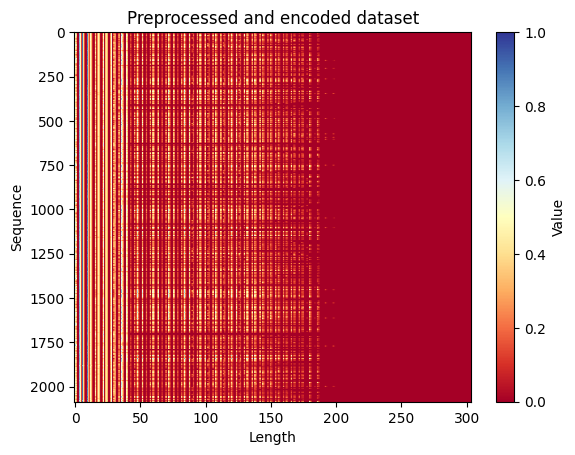

(2086, 304)


In [7]:
def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Preprocessed and encoded dataset')
  plt.xlabel('Length')
  plt.ylabel('Sequence')
  plt.show()


plot_patterns(input_data)
print(input_data.shape)

prep_data=input_data


###DAGMM


Epoch 0/100,TRAIN Loss: 236.7221 - TEST Loss: 66.5165
Epoch 10/100,TRAIN Loss: 18.4859 - TEST Loss: 10.9964
Epoch 20/100,TRAIN Loss: 9.2974 - TEST Loss: 5.3517
Epoch 30/100,TRAIN Loss: 5.6922 - TEST Loss: 3.2279
Epoch 40/100,TRAIN Loss: 3.7598 - TEST Loss: 2.0381
Epoch 50/100,TRAIN Loss: 2.5525 - TEST Loss: 1.3265
Epoch 60/100,TRAIN Loss: 1.7336 - TEST Loss: 0.8057
Epoch 70/100,TRAIN Loss: 1.1594 - TEST Loss: 0.4480
Epoch 80/100,TRAIN Loss: 0.7342 - TEST Loss: 0.1670
Epoch 90/100,TRAIN Loss: 0.3998 - TEST Loss: -0.0425


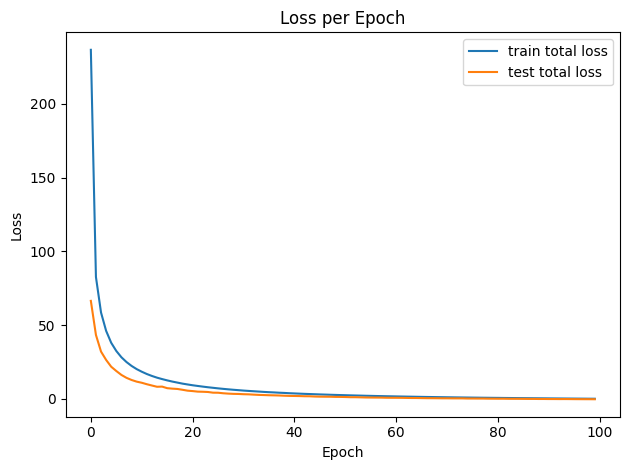

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from torch.autograd import Variable
import tensorflow as tf


# Define Deep Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, latent_dim-2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim-2, hidden_dim3),
            nn.Tanh(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.Tanh(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.Tanh(),
            nn.Linear(hidden_dim1, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return z, x_hat

# Define DAGMM Model
class DAGMM(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm):
        super(DAGMM, self).__init__()
        self.autoencoder = Autoencoder(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.estimation_network = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.Tanh(),
            nn.Dropout(p=0.5),
            nn.Linear(hidden_dim3, n_gmm),
            nn.Softmax(dim=1)
        )
        self.phi = torch.zeros(n_gmm)
        self.mu = torch.zeros(n_gmm,latent_dim)
        self.cov = torch.zeros(n_gmm, latent_dim, latent_dim)
        self.n_gmm=n_gmm
        self.latent_dim=latent_dim

    def relative_euclidean_distance(self, a, b):
        return (a-b).norm(2, dim=1) / a.norm(2, dim=1)

    def compute_cosine_similarity(self, x, x_hat):
        cosine_similarity = F.cosine_similarity(x, x_hat, dim=1)
        return cosine_similarity

    def cov_diag_loss(self):
        cov_inv = torch.zeros(self.cov.size(0), self.cov.size(1), self.cov.size(1), device=self.cov.device)
        det_cov = torch.zeros(self.cov.size(0), device=self.cov.device)
        cov_diag = 0
        for i in range(self.cov.size(0)):
            cov_k = self.cov[i].clone()
            cov_k += torch.diag(torch.full((self.cov.size(1),), 1e-12, device=self.cov.device))
            cov_inv[i] = torch.linalg.inv(cov_k)
            u, s, v = torch.svd(cov_k)
            det_cov[i] = s.prod() ** 2
            cov_diag += torch.sum(1 / cov_k.diag())

        return cov_diag, cov_inv, det_cov


    def forward(self, x):
        z, x_hat = self.autoencoder(x)
        rec_euclidean = self.relative_euclidean_distance(x, x_hat)
        cosine_similarity = self.compute_cosine_similarity(x,x_hat)
        z_with_errors = torch.cat([z, rec_euclidean.unsqueeze(-1), cosine_similarity.unsqueeze(-1)], dim=1)
        gamma = self.estimation_network(z_with_errors)
        return z, x_hat, z_with_errors, gamma


    def compute_energy(self, z):
        cov_diag, cov_inv, det_cov = self.cov_diag_loss()
        z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
        z_mu_cov_inv = torch.sum(z_mu.unsqueeze(-1) * cov_inv.unsqueeze(0), dim=-2)
        exp_term = torch.exp(-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1))
        positive_exp_term = (-0.5 * torch.sum(z_mu_cov_inv * z_mu, dim=-1)).clamp(min=0)
        max_positive_exp_term = torch.max(positive_exp_term, dim=1, keepdim=True)[0]
        energy = -max_positive_exp_term.squeeze() - torch.log(
            torch.sum(self.phi.unsqueeze(0) * exp_term / (torch.sqrt(det_cov)).unsqueeze(0), dim=1) + 1e-12
        )
        return energy



    def loss_function(self, x, lambda_energy, lambda_cov_diag):
        _, x_hat, z, gamma, = self(x)
        N = gamma.size(0)
        sum_gamma = torch.sum(gamma, dim=0)
        if model.training:
          self.phi = (sum_gamma / N)
          self.mu = torch.sum(gamma.unsqueeze(-1) * z.unsqueeze(1), dim=0) / sum_gamma.unsqueeze(-1)
          z_mu = (z.unsqueeze(1)- self.mu.unsqueeze(0))
          z_mu_outer = z_mu.unsqueeze(-1) * z_mu.unsqueeze(-2)
          self.cov = torch.sum(gamma.unsqueeze(-1).unsqueeze(-1) * z_mu_outer, dim = 0) / sum_gamma.unsqueeze(-1).unsqueeze(-1)
        sample_energy = self.compute_energy(z)
        loss = torch.mean((x - x_hat) ** 2) + lambda_energy * torch.mean(sample_energy) + lambda_cov_diag * self.cov_diag_loss()[0]
        return loss

    def get_energy(self, x,  torch_type=True):
        enc, dec, z, gamma = self(x)
        energy = self.compute_energy(z)
        ret_energy=energy.data.numpy()

        if torch_type == True:
          ret_energy=torch.from_numpy(ret_energy)

        return ret_energy


# Hyperparameters
input_dim = len(prep_data[0])
hidden_dim1 = 400
hidden_dim2 = 200
hidden_dim3 = 30
latent_dim = 3
n_gmm = 5
lr = 1e-5
epochs = 100
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 80

# Create model and optimizer
model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Training function
def train(model, train_loader, test_loader, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        epoch_loss_test = 0.0
        running_loss = 0.0
        test_running_loss=0.0
        count=0
        count_test=0
        for batch_idx, data in enumerate(train_loader):
            optimizer.zero_grad()
            total_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
            model.zero_grad()
            total_loss.backward()
            # torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
            optimizer.step()
            running_loss += total_loss.item()

            loss = []
            loss.append( total_loss.item())
            count+=1
        epoch_loss=running_loss/count
        train_losses.append(epoch_loss)

        model.eval()
        with torch.no_grad():
            for batch_idx, data in enumerate(test_loader):
                test_loss = model.loss_function(data, lambda_energy, lambda_cov_diag)
                loss = []
                loss.append( test_loss.item())
                test_running_loss += test_loss.item()
                count_test+=1
        epoch_loss_test=test_running_loss/count_test
        test_losses.append(epoch_loss_test)
        if epoch%10 == 0:
          print(f"Epoch {epoch}/{num_epochs},TRAIN Loss: {epoch_loss:.4f} - TEST Loss: {epoch_loss_test:.4f}")
    return train_losses, test_losses


# Plotting function
def plot_losses(loss_data):
    plt.plot(loss_data[0], label="train total loss")
    plt.plot(loss_data[1], label="test total loss")
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
    plt.show()



# Train the model
losses = train(model, train_loader, test_loader, optimizer, epochs)

# Test the model
# test_losses = test(model, test_loader)

# avg_test_energy = sum(test_energy) / len(test_energy)

# Plot losses
plot_losses(losses)  # Broadcasting test loss to match training loss length
# print("Average Test Energy: ", avg_test_energy)
# plot_losses(test_losses)

threshold 27.63102149963379
Detected 15 anomalies in test.
Detected 46 anomalies in train.


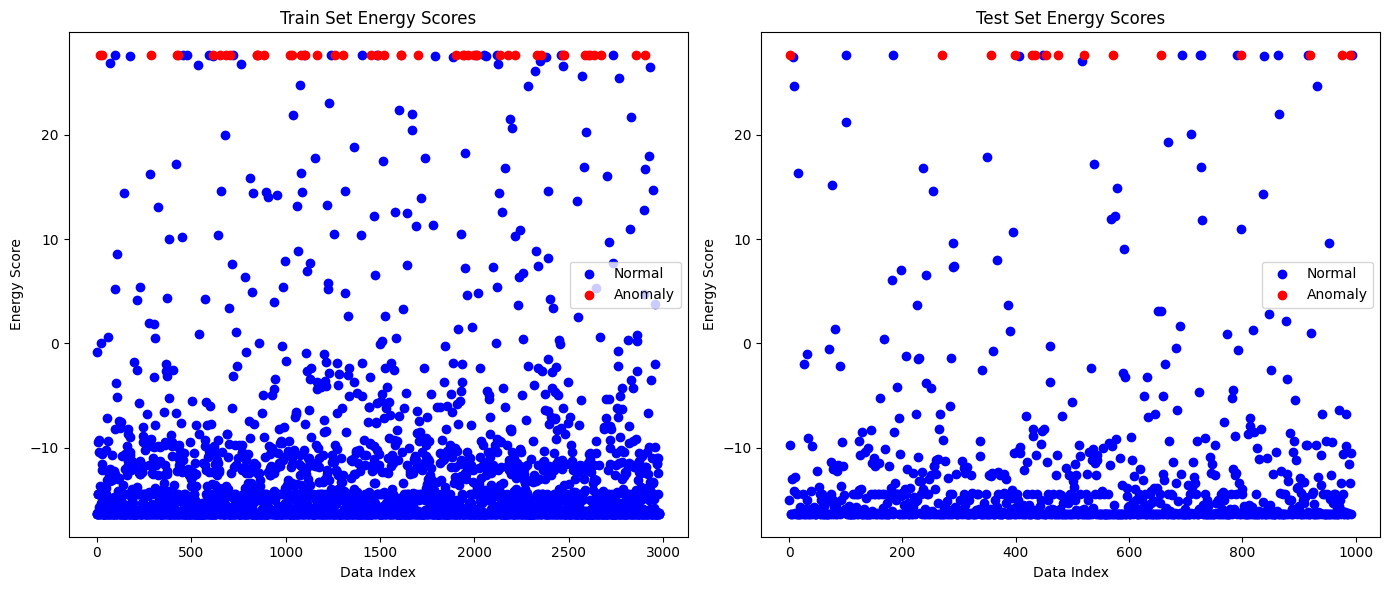

In [ ]:
import matplotlib.pyplot as plt

# Compute energy scores for train and test data
train_energy = model.get_energy(train_data)
test_energy = model.get_energy(test_data)

all_energy=np.concatenate((train_energy, test_energy), axis=0)

threshold = np.percentile(all_energy, 99)
print(f"threshold {threshold}")

anomaly_indices_test=torch.where(test_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_test)} anomalies in test.")

anomaly_indices_train=torch.where(train_energy >= threshold)[0]

# anomaly_indices = (np.array(eval_energy) > threshold).astype(int)[0]
print(f"Detected {len(anomaly_indices_train)} anomalies in train.")

# Create plots
plt.figure(figsize=(14, 6))

# Train set plot
plt.subplot(1, 2, 1)
normal_train_indices = torch.where(train_energy < threshold)[0]
anomaly_train_indices = torch.where(train_energy >= threshold)[0]
plt.scatter(normal_train_indices, train_energy[normal_train_indices], c='blue', label='Normal')
plt.scatter(anomaly_train_indices, train_energy[anomaly_train_indices], c='red', label='Anomaly')
plt.title('Train Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
normal_test_indices = torch.where(test_energy < threshold)[0]
anomaly_test_indices = torch.where(test_energy >= threshold)[0]
plt.scatter(normal_test_indices, test_energy[normal_test_indices], c='blue', label='Normal')
plt.scatter(anomaly_test_indices, test_energy[anomaly_test_indices], c='red', label='Anomaly')
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
# Find the index of the maximum energy score
max_energy_index = torch.argmax(train_energy)
print(train_energy[torch.argmax(train_energy)])

print("Index of the maximum energy score:", max_energy_index.item())
matching=train_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

max_energy_index = torch.argmax(test_energy)
print(test_energy[max_energy_index])

print("Index of the maximum energy score:", max_energy_index.item())
matching=test_data[max_energy_index]
matching_index = None
for i, node in enumerate(torch.tensor(prep_data, dtype=torch.float)):
    if np.array_equal(node, matching):
        matching_index = i
        break

flat_dataset = [item for sublist in dataset for item in sublist]
print("Index of matching node:", matching_index)
print("in dataset: ", flat_dataset[matching_index])

tensor(27.6310)
Index of the maximum energy score: 20
Index of matching node: 2212
in dataset:  {'BlockNumber': 13110794, 'TxHash': '0x18648a96fa42799e7cfbe59747ff53aad5cbb7a3ac1b3151d556468acdafb909', 'CallList': [{'to': '0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 'from': '0x69eff55ec554a155a1952e539425231b2819d317', 'value': '0.0', 'gas': '0.000000000000157912', 'input': '0x18cbafe5'}, [{'to': '0x08650bb9dc722c9c8c62e79c2bafa2d3fc5b3293', 'from': '0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 'value': '0.0', 'gas': '0.000000000000002504', 'input': '0x0902f1ac'}, {'to': '0xff20817765cb7f73d4bde2e66e067e58d11095c2', 'from': '0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 'value': '0.0', 'gas': '0.000000000000077079', 'input': '0x23b872dd'}, [{'to': '0x1820a4b7618bde71dce8cdc73aab6c95905fad24', 'from': '0xff20817765cb7f73d4bde2e66e067e58d11095c2', 'value': '0.0', 'gas': '0.000000000000002942', 'input': '0xaabbb8ca'}, {'to': '0x1820a4b7618bde71dce8cdc73aab6c95905fad24', 'from': '0xff20817

16
16
66
948
SIZE
16
688


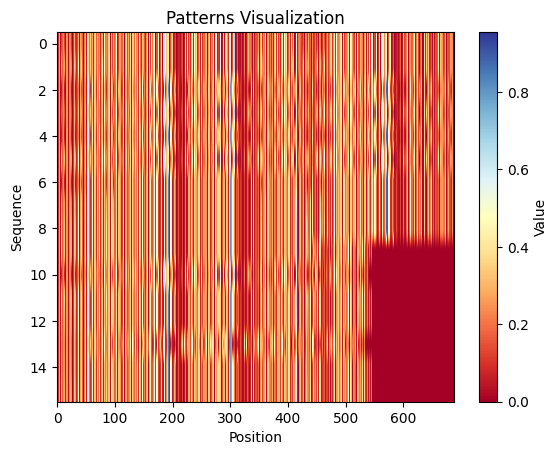

(16, 688)
eval 1:  tensor([27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310,
        27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310])


In [ ]:
with open('attackdata.json', 'r') as f:
    data = json.load(f)

anomally_dataset=data

anom1 = preprocess(anomally_dataset)

print(len(unnested_calls[0]))
print(len(anom1[0]))
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)

def plot_patterns(data):
  plt.imshow(data, cmap='RdYlBu', aspect='auto')
  plt.colorbar(label='Value')
  plt.title('Patterns Visualization')
  plt.xlabel('Position')
  plt.ylabel('Sequence')
  plt.gca().yaxis.get_major_locator().set_params(integer=True)
  plt.show()


plot_patterns(anom_fin)
print(anom_fin.shape)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res1=model.get_energy(anom)


print("eval 1: ", res1)


<class 'torch.Tensor'>
tensor([27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310,
        27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310, 27.6310])
try again


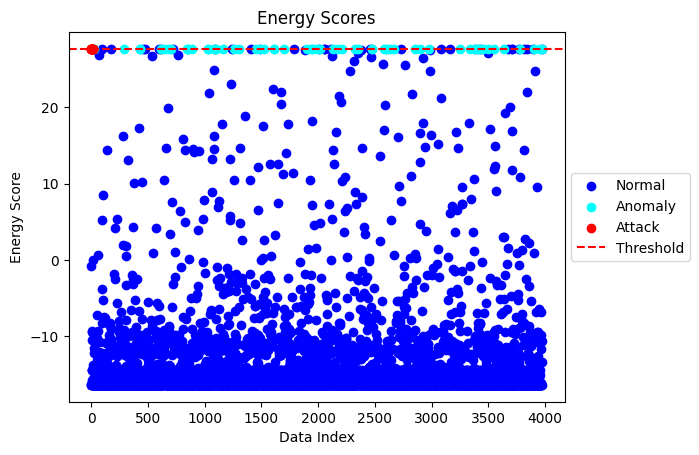

In [ ]:
print(type(test_energy))

normal_energy=torch.cat((train_energy, test_energy), dim=0)

normal_indices = torch.where(normal_energy < threshold)[0]
anomaly_indices = torch.where(normal_energy >= threshold)[0]
attack = res1.detach()


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)
plt.scatter(range(len(attack)), attack, c='red', label='Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if(attack[0]>threshold):
  print("Found you")
else:
  print("try again")


733
733
SIZE
733
688


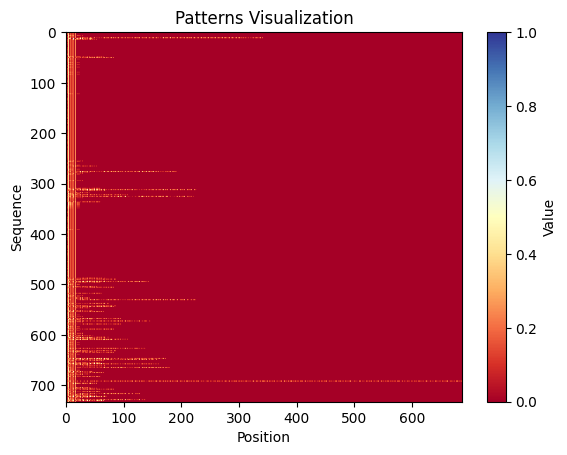

In [ ]:
with open('testdata6.json', 'r') as f:
    data = json.load(f)

example_dataset=data

# with open('attackdata.json', 'r') as f:
#     data = json.load(f)

# example_dataset+=[data]


exam1 = preprocess(example_dataset)

exam_fin, _=encode(exam1, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)



plot_patterns(exam_fin)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
  res2=model.get_energy(exam)



[]

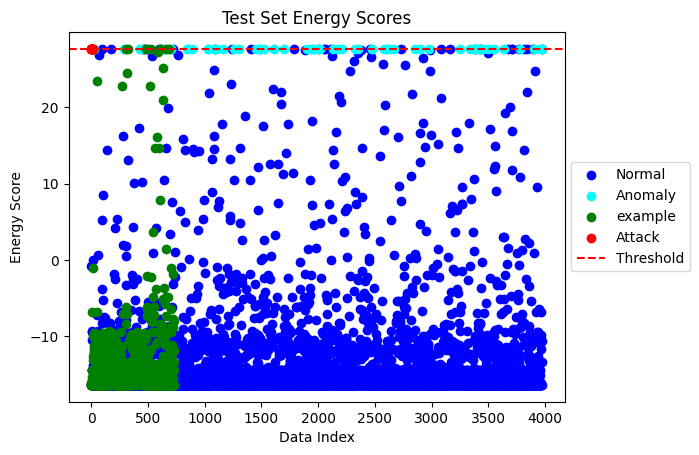

In [ ]:
example = res2.detach()

plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
plt.scatter(range(len(example)), example, c='green', label='example')

plt.scatter(range(len(attack)), attack, c='red', label='Attack')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Test Set Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.plot()


In [ ]:
max_energy_index = torch.argmax(example)
print("Index of the maximum energy score:", max_energy_index.item())
matching=example[max_energy_index].item()
matching_index = None
# for i, node in enumerate(torch.tensor(exam_fin, dtype=torch.float)):
#     if np.array_equal(node, matching):
#         matching_index = i
#         break

flat_dataset = [item for sublist in example_dataset for item in sublist]
print("Energy found:", matching)
if matching != None:
  print("in dataset: ", flat_dataset[max_energy_index])

Index of the maximum energy score: 11
Energy found: 27.63102149963379
in dataset:  {'BlockNumber': 13109520, 'TxHash': '0x03bd0bcde75a966bb0c05a175f933956e5a6708d84a8424069efde739365d784', 'CallList': [{'to': '0x881d40237659c251811cec9c364ef91dc08d300c', 'from': '0xf5f5bab4c918419865eb62190b2630054b930893', 'value': '0.0', 'gas': '0.000000000000651563', 'input': '0x5f575529'}, [{'to': '0xff20817765cb7f73d4bde2e66e067e58d11095c2', 'from': '0x881d40237659c251811cec9c364ef91dc08d300c', 'value': '0.0', 'gas': '0.000000000000155988', 'input': '0x23b872dd'}, [{'to': '0x1820a4b7618bde71dce8cdc73aab6c95905fad24', 'from': '0xff20817765cb7f73d4bde2e66e067e58d11095c2', 'value': '0.0', 'gas': '0.000000000000002942', 'input': '0xaabbb8ca'}, {'to': '0x1820a4b7618bde71dce8cdc73aab6c95905fad24', 'from': '0xff20817765cb7f73d4bde2e66e067e58d11095c2', 'value': '0.0', 'gas': '0.000000000000002942', 'input': '0xaabbb8ca'}], {'to': '0x74de5d4fcbf63e00296fd95d33236b9794016631', 'from': '0x881d40237659c251811

In [ ]:
def print_metrics(threshold, train_energy, test_energy, attack, example):

  print("the attack is found by the model: ", (attack[0] >= threshold).item())
  print("The threshold is: ", threshold)
  print("The energy value of the attack is: ", attack[0])
  print("the highest energy in train is: ", train_energy[torch.argmax(train_energy)])
  print("the highest energy in test is: ", test_energy[torch.argmax(test_energy)])
  print("the highest energy in example is: ", example[torch.argmax(example)])

  print("------------------")

  print("number of transactions with energy greater or equal to the threshold in train is: ", len(torch.where(train_energy >= threshold)[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the threshold in test is: ", len(torch.where(test_energy >= threshold)[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the threshold in example is: ", len(torch.where(example >= threshold)[0]), " out of: ", len(example))

  print("------------------")

  print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(train_energy >= attack[0])[0]), " out of: ", len(train_energy))
  print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(test_energy >= attack[0])[0]), " out of: ", len(test_energy))
  print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example >= attack[0])[0]), " out of: ", len(example))

  print("------------------")

  print("average energy value in train is: ",torch.mean(train_energy))
  print("average energy value in test is: ",torch.mean(test_energy))
  print("average energy value in example is: ",torch.mean(example))

print_metrics(threshold, train_energy, test_energy, attack, example)

the attack is found by the model:  True
The threshold is:  27.63102149963379
The energy value of the attack is:  tensor(27.6310)
the highest energy in train is:  tensor(27.6310)
the highest energy in test is:  tensor(27.6310)
the highest energy in example is:  tensor(27.6310)
------------------
number of transactions with energy greater or equal to the threshold in train is:  46  out of:  2980
number of transactions with energy greater or equal to the threshold in test is:  15  out of:  994
number of transactions with energy greater or equal to the threshold in example is:  7  out of:  733
------------------
number of transactions with energy greater or equal to the attack in train is:  46  out of:  2980
number of transactions with energy greater or equal to the attack in test is:  15  out of:  994
number of transactions with energy greater or equal to the attack in example is:  7  out of:  733
------------------
average energy value in train is:  tensor(-12.3626)
average energy value 

###True False

In i=  0
Epoch 0/100,TRAIN Loss: 289.0920 - TEST Loss: 113.1539
Epoch 10/100,TRAIN Loss: 12.6129 - TEST Loss: 13.4755
Epoch 20/100,TRAIN Loss: 8.6689 - TEST Loss: 9.2021
Epoch 30/100,TRAIN Loss: 6.3959 - TEST Loss: 6.7089
Epoch 40/100,TRAIN Loss: 4.9349 - TEST Loss: 5.1038
Epoch 50/100,TRAIN Loss: 3.9376 - TEST Loss: 4.0728
Epoch 60/100,TRAIN Loss: 3.1823 - TEST Loss: 3.2646
Epoch 70/100,TRAIN Loss: 2.6316 - TEST Loss: 2.6820
Epoch 80/100,TRAIN Loss: 2.1648 - TEST Loss: 2.1870
Epoch 90/100,TRAIN Loss: 1.8044 - TEST Loss: 1.8356


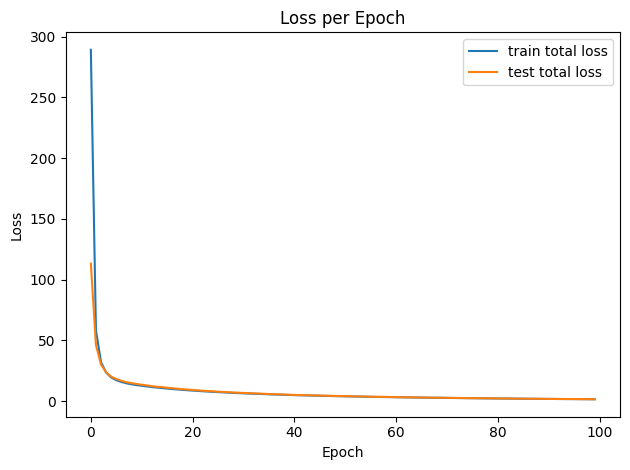

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  1.0
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  0.0
True possitive:  1.0
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  0.0
True possitive:  1.0
True negative:  0.9931787175989086
False possitive:  0.0068212824010914054
False negative:  0.0
True possitive:  1.0
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.0
True possitive:  1.0
True negative:  0.965893587994543
False possitive:  0.034106412005457026
False negative:  0.0
True possitive:  1.0
True negative:  0.9440654843110505
False possitive:  0.05593451568894952
False negative:  0.0
True possitive:  1.0
True negative:  0.7735334242837654
False possitive:  0.22646657571623466
False negative:  0.0
In i=  1
Epoch 0/100,TRAIN Loss: 412.5809 - TEST Loss: 106.3388
Epoch 10/100,TRAIN Loss: 16.7970 - TEST Loss: 14.7048
Epoch 20/100,TRAIN Loss: 12.1185 

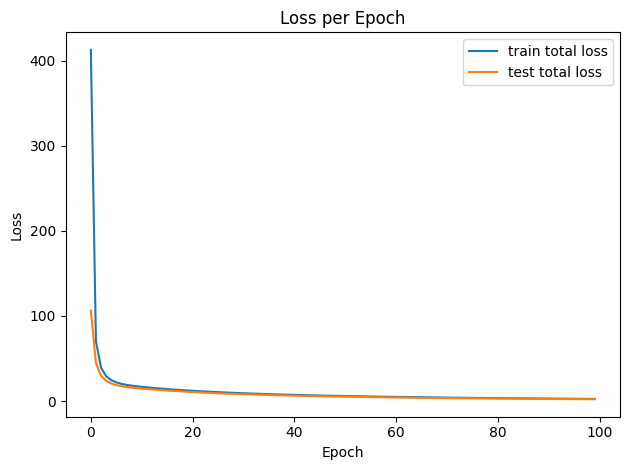

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9918144611186903
False possitive:  0.008185538881309686
False negative:  0.0
True possitive:  1.0
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.0
True possitive:  1.0
True negative:  0.9699863574351978
False possitive:  0.030013642564802184
False negative:  0.0
True possitive:  1.0
True negative:  0.9331514324693042
False possitive:  0.06684856753069578
False negative:  0.0
True possitive:  1.0
True negative:  0.7598908594815825
False possitive:  0.24010914051841747
False negative:  0.0
In i=  2
Epoch 0/100,TRAIN Loss: 684.1896 - TEST Loss: 185.7755
Epoch 10/100,TRAIN Loss: 21.2033 - TEST Loss: 22.9810
Epoch 20/100,TRAIN Loss: 15.4118 

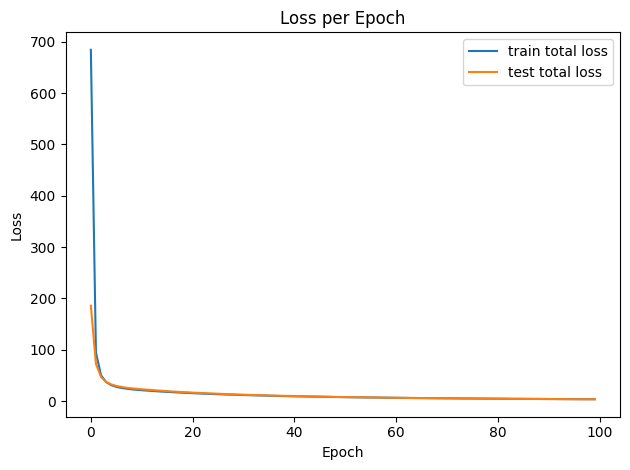

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9945429740791268
False possitive:  0.005457025920873124
False negative:  0.0
True possitive:  1.0
True negative:  0.9877216916780355
False possitive:  0.01227830832196453
False negative:  0.0
True possitive:  1.0
True negative:  0.965893587994543
False possitive:  0.034106412005457026
False negative:  0.0
True possitive:  1.0
True negative:  0.91268758526603
False possitive:  0.08731241473396999
False negative:  0.0
True possitive:  1.0
True negative:  0.7421555252387448
False possitive:  0.2578444747612551
False negative:  0.0
In i=  3
Epoch 0/100,TRAIN Loss: 468.5453 - TEST Loss: 172.6597
Epoch 10/100,TRAIN Loss: 17.7969 - TEST Loss: 20.9746
Epoch 20/100,TRAIN Loss: 12.8565 - TES

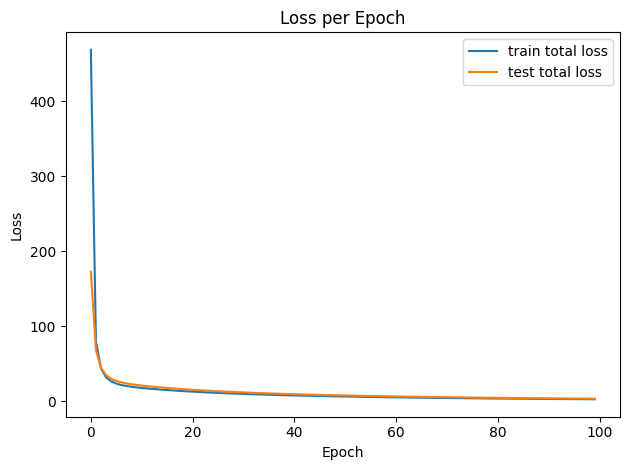

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  0.0
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  1.0
True possitive:  0.0
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  1.0
True possitive:  0.0625
True negative:  0.9945429740791268
False possitive:  0.005457025920873124
False negative:  0.9375
True possitive:  0.375
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.625
True possitive:  0.75
True negative:  0.9686221009549796
False possitive:  0.03137789904502047
False negative:  0.25
True possitive:  1.0
True negative:  0.9427012278308322
False possitive:  0.0572987721691678
False negative:  0.0
True possitive:  1.0
True negative:  0.7353342428376535
False possitive:  0.2646657571623465
False negative:  0.0
In i=  4
Epoch 0/100,TRAIN Loss: 704.8366 - TEST Loss: 188.7118
Epoch 10/100,TRAIN Loss: 21.4044 - TEST Loss: 22.9546
Epoch 20/100,TRAIN Loss:

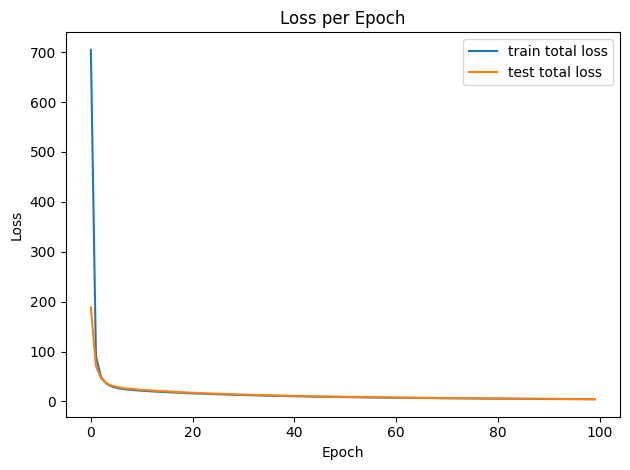

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.990450204638472
False possitive:  0.009549795361527967
False negative:  0.0
True possitive:  1.0
True negative:  0.9877216916780355
False possitive:  0.01227830832196453
False negative:  0.0
True possitive:  1.0
True negative:  0.9672578444747613
False possitive:  0.03274215552523874
False negative:  0.0
True possitive:  1.0
True negative:  0.9454297407912687
False possitive:  0.054570259208731244
False negative:  0.0
True possitive:  1.0
True negative:  0.7244201909959073
False possitive:  0.2755798090040928
False negative:  0.0
In i=  5
Epoch 0/100,TRAIN Loss: 435.4684 - TEST Loss: 109.9489
Epoch 10/100,TRAIN Loss: 18.7087 - TEST Loss: 16.0725
Epoch 20/100,TRAIN Loss: 13.8578 - T

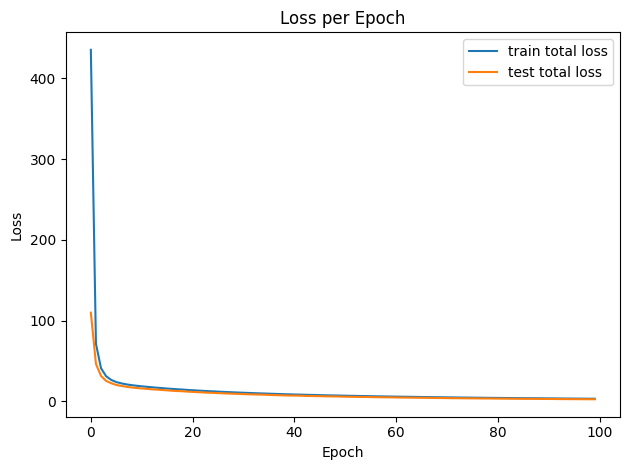

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  0.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  1.0
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9918144611186903
False possitive:  0.008185538881309686
False negative:  0.0
True possitive:  1.0
True negative:  0.9918144611186903
False possitive:  0.008185538881309686
False negative:  0.0
True possitive:  1.0
True negative:  0.965893587994543
False possitive:  0.034106412005457026
False negative:  0.0
True possitive:  1.0
True negative:  0.9099590723055935
False possitive:  0.09004092769440655
False negative:  0.0
True possitive:  1.0
True negative:  0.694406548431105
False possitive:  0.30559345156889495
False negative:  0.0
In i=  6
Epoch 0/100,TRAIN Loss: 487.1190 - TEST Loss: 157.2287
Epoch 10/100,TRAIN Loss: 16.9092 - TEST Loss: 20.9210
Epoch 20/100,TRAIN Loss: 12.4644 - 

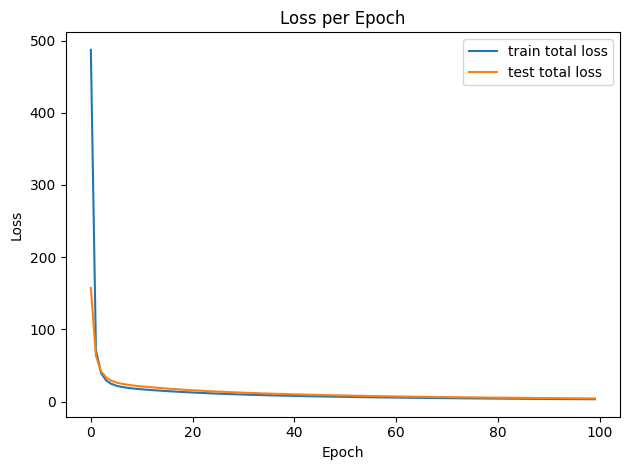

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9931787175989086
False possitive:  0.0068212824010914054
False negative:  0.0
True possitive:  1.0
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.0
True possitive:  1.0
True negative:  0.9645293315143247
False possitive:  0.03547066848567531
False negative:  0.0
True possitive:  1.0
True negative:  0.9236016371077762
False possitive:  0.07639836289222374
False negative:  0.0
True possitive:  1.0
True negative:  0.7544338335607094
False possitive:  0.24556616643929058
False negative:  0.0
In i=  7
Epoch 0/100,TRAIN Loss: 260.7336 - TEST Loss: 94.6622
Epoch 10/100,TRAIN Loss: 12.3299 - TEST Loss: 12.7029
Epoch 20/100,TRAIN Loss: 8.9724 - 

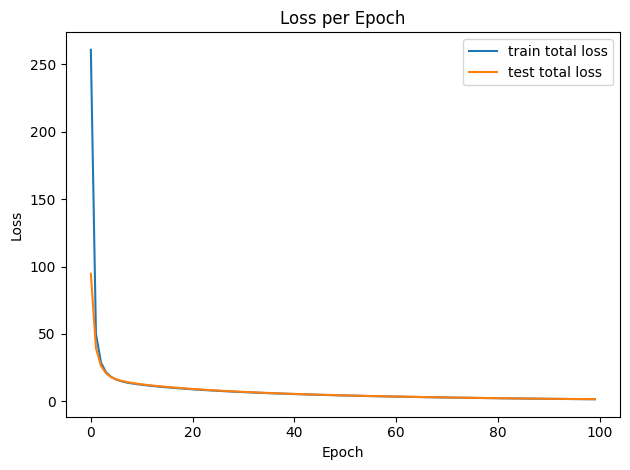

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  0.9375
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  0.0625
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9918144611186903
False possitive:  0.008185538881309686
False negative:  0.0
True possitive:  1.0
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.0
True possitive:  1.0
True negative:  0.9672578444747613
False possitive:  0.03274215552523874
False negative:  0.0
True possitive:  1.0
True negative:  0.9072305593451568
False possitive:  0.0927694406548431
False negative:  0.0
True possitive:  1.0
True negative:  0.7544338335607094
False possitive:  0.24556616643929058
False negative:  0.0
In i=  8
Epoch 0/100,TRAIN Loss: 796.9370 - TEST Loss: 258.4869
Epoch 10/100,TRAIN Loss: 23.1696 - TEST Loss: 24.0406
Epoch 20/100,TRAIN Loss: 16.4

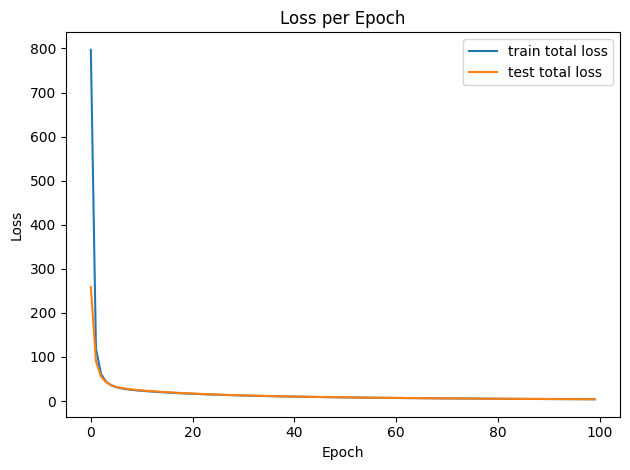

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  0.5625
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  0.4375
True possitive:  0.6875
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.3125
True possitive:  0.8125
True negative:  0.9918144611186903
False possitive:  0.008185538881309686
False negative:  0.1875
True possitive:  1.0
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.0
True possitive:  1.0
True negative:  0.9699863574351978
False possitive:  0.030013642564802184
False negative:  0.0
True possitive:  1.0
True negative:  0.9085948158253752
False possitive:  0.09140518417462483
False negative:  0.0
True possitive:  1.0
True negative:  0.7189631650750341
False possitive:  0.2810368349249659
False negative:  0.0
In i=  9
Epoch 0/100,TRAIN Loss: 292.8793 - TEST Loss: 83.4371
Epoch 10/100,TRAIN Loss: 15.9592 - TEST Loss: 12.8835
Epoch 20/100,TRAI

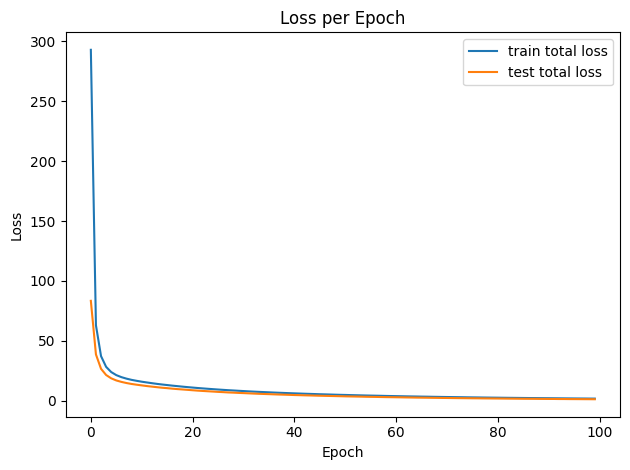

733
733
SIZE
733
688
16
16
SIZE
16
688
True possitive:  0.875
True negative:  0.9986357435197817
False possitive:  0.001364256480218281
False negative:  0.125
True possitive:  1.0
True negative:  0.9972714870395635
False possitive:  0.002728512960436562
False negative:  0.0
True possitive:  1.0
True negative:  0.9931787175989086
False possitive:  0.0068212824010914054
False negative:  0.0
True possitive:  1.0
True negative:  0.9890859481582538
False possitive:  0.010914051841746248
False negative:  0.0
True possitive:  1.0
True negative:  0.9672578444747613
False possitive:  0.03274215552523874
False negative:  0.0
True possitive:  1.0
True negative:  0.9427012278308322
False possitive:  0.0572987721691678
False negative:  0.0
True possitive:  1.0
True negative:  0.6903137789904502
False possitive:  0.3096862210095498
False negative:  0.0

Results after 10 model trains
_____________________________
For threshold =  0.01
False possitive:  0.7375
True possitive:  0.002046384720327421
Fal

In [ ]:
input_dim = len(prep_data[0])
hidden_dim1 = 2000
hidden_dim2 = 600
hidden_dim3 = 200
latent_dim = 3
n_gmm = 5
lr = 1e-5
epochs = 100
lambda_energy=0.1
lambda_cov_diag=0.005
batch_size = 500

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

def stats(example, attack, threshold):
  res=[]
  for thres in threshold:
    false_pos=len(torch.where(example >= thres)[0])/len(example)
    true_pos=len(torch.where(attack >= thres)[0])/len(attack)
    false_neg=len(torch.where(attack < thres)[0])/len(attack)
    true_neg=len(torch.where(example < thres)[0])/len(example)
    res.append([true_pos, true_neg, false_pos, false_neg])

  return res



def train_model(model, prep_data, optimizer, epochs):
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


  losses = train(model, train_loader, test_loader, optimizer, epochs)
  plot_losses(losses)
  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():
    train_energy = model.get_energy(train_data)
    test_energy = model.get_energy(test_data)

    all_energy=np.concatenate((train_energy, test_energy), axis=0)

    threshold = [np.percentile(all_energy, 99.99),np.percentile(all_energy, 99.9),np.percentile(all_energy, 99.5),np.percentile(all_energy, 99),np.percentile(all_energy, 95),np.percentile(all_energy, 90),np.percentile(all_energy, 75)]

    with open('testdata6.json', 'r') as f:
      data = json.load(f)

    example_dataset=data
    exam1 = preprocess(example_dataset)
    exam_fin, _=encode(exam1, maxL)
    exam = torch.tensor(exam_fin, dtype=torch.float)
    res2=model.get_energy(exam)
    example = res2.detach()
    with open('attackdata.json', 'r') as f:
      data = json.load(f)
    anomally_dataset=data
    anom1 = preprocess(anomally_dataset)
    anom_fin,_=encode(anom1, maxL)
    anom = torch.tensor(anom_fin, dtype=torch.float)
    res1=model.get_energy(anom)
    attack = res1.detach()

    ftpn=stats(example, attack, threshold)
    return ftpn
i=0
while(i<10):
  print("In i= ", i)
  model = DAGMM(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, n_gmm)
  optimizer = optim.Adam(model.parameters(), lr=lr)
  results = train_model(model, prep_data, optimizer, epochs)
  count=0
  for res in results:
    print("True possitive: ", res[0])
    print("True negative: ", res[1])
    print("False possitive: ", res[2])
    print("False negative: ", res[3])
    true_pos_arr[count].append(res[0])
    true_neg_arr[count].append(res[1])
    false_pos_arr[count].append(res[2])
    false_neg_arr[count].append(res[3])
    count+=1
  i+=1
thresholds=[0.01, 0.1, 0.5, 1, 5, 10, 25]
print()
print("Results after 10 model trains")
print("_____________________________")
count=0
for tr in thresholds:
  print("For threshold = ", tr)
  print("False possitive: ", mean(true_pos_arr[count]))
  print("True possitive: ", mean(false_pos_arr[count]))
  print("False negative: ", mean(true_neg_arr[count]))
  print("True negative: ", mean(false_neg_arr[count]))
  count+=1




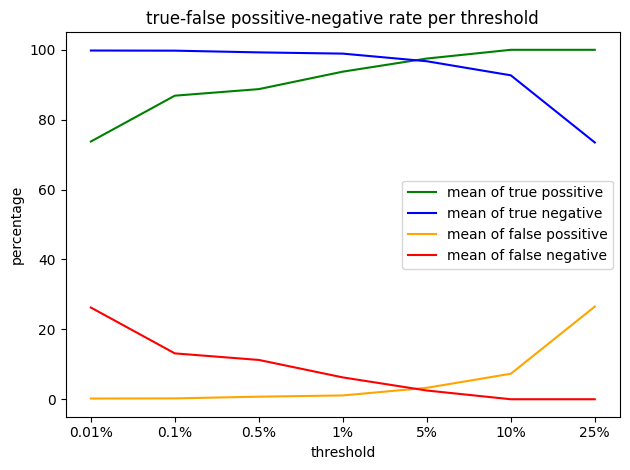

In [ ]:
  mtp=[]
  mfp=[]
  mtn=[]
  mfn=[]
  t=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
  count=0
  for tr in thresholds:
    mtp.append(mean(true_pos_arr[count])*100)
    mtn.append(mean(true_neg_arr[count])*100)
    mfp.append(mean(false_pos_arr[count])*100)
    mfn.append(mean(false_neg_arr[count])*100)
    count+=1

  plt.plot(t, mtp, label="mean of true possitive", c='green')
  plt.plot(t, mtn, label="mean of true negative", c='blue')
  plt.plot(t, mfp, label="mean of false possitive", c='orange')
  plt.plot(t, mfn, label="mean of false negative", c='red')
  plt.title('true-false possitive-negative rate per threshold')
  plt.xlabel('threshold')
  plt.ylabel('percentage')
  plt.legend()
  plt.tight_layout()
  # plt.ylim(loss_data[1][len(loss_data[0])-1]-2,loss_data[1][len(loss_data[0])-1]+2)
  plt.show()


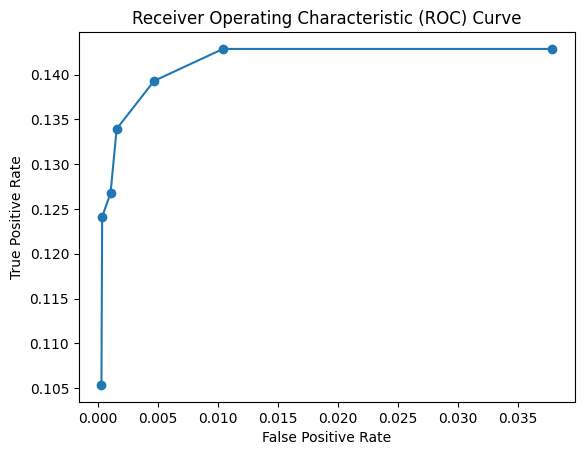

In [ ]:

total_positives = sum(mtp) + sum(mfn)
total_negatives = sum(mtn) + sum(mfp)

# Calculate TPR and FPR
TPR = [tp / total_positives for tp in mtp]
FPR = [fp / total_negatives for fp in mfp]

# Plotting the ROC curve
plt.plot(FPR, TPR, marker='o')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Displaying the plot
plt.show()

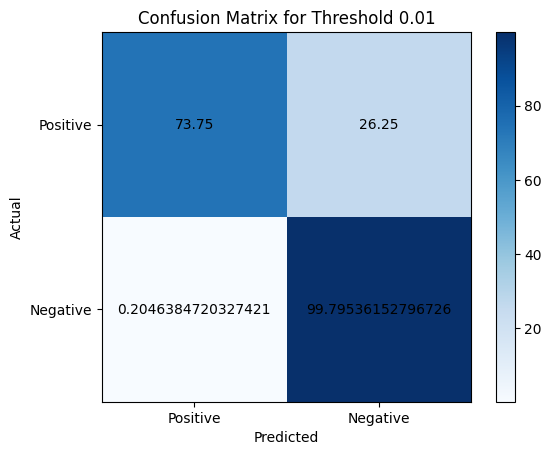

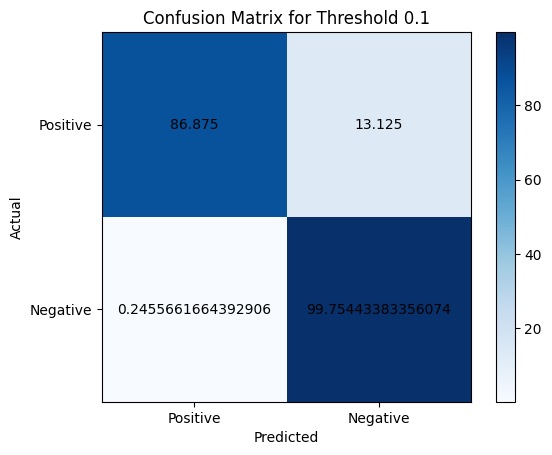

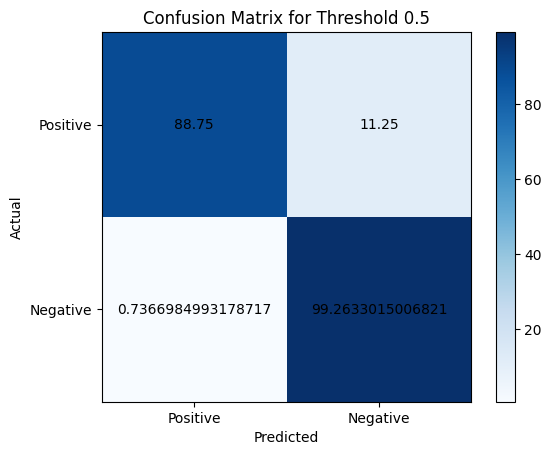

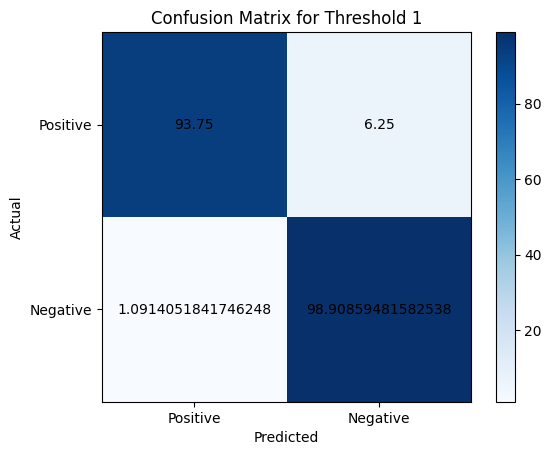

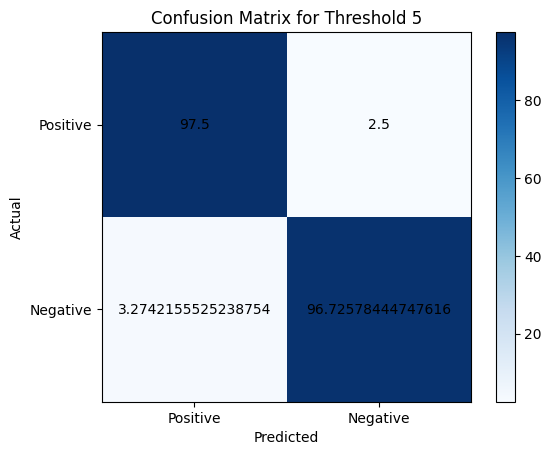

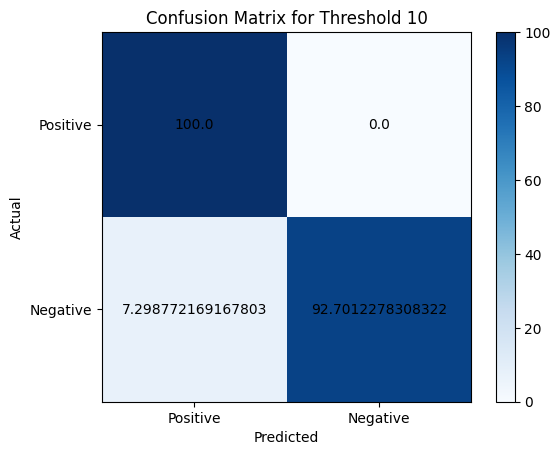

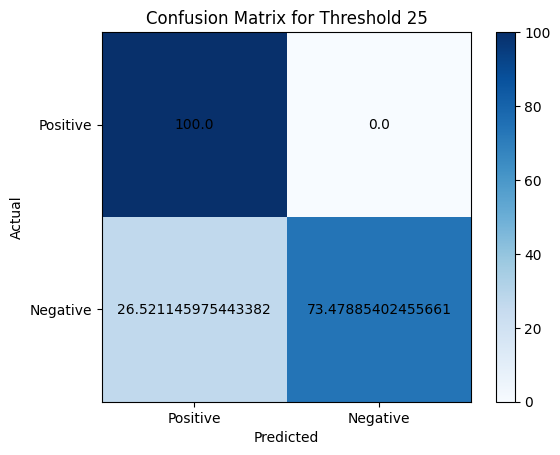

In [ ]:
# Sample percentages of TP, TN, FP, FN for different thresholds


for i, threshold in enumerate(thresholds):

    total_positives = mtp[i] + mfn[i]
    total_negatives = mtn[i] + mfp[i]

    # Calculate TP, TN, FP, FN
    TP = mtp[i] / 100 * total_positives
    TN = mtn[i] / 100 * total_negatives
    FP = mfp[i] / 100 * total_negatives
    FN = mfn[i] / 100 * total_positives

    # Creating confusion matrix
    confusion_matrix = np.array([[TP, FN], [FP, TN]])

    # Plotting the confusion matrix
    plt.figure()
    plt.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()

    # Adding labels
    plt.title(f'Confusion Matrix for Threshold {threshold}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks([0, 1], ['Positive', 'Negative'])
    plt.yticks([0, 1], ['Positive', 'Negative'])

    # Displaying the plot
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center')

plt.show()


###Isolation Forest


In [8]:
with open('testdata6.json', 'r') as f:
  data = json.load(f)

example_dataset=data
exam1 = preprocess(example_dataset)
exam_fin, _=encode(exam1, maxL)
exam = torch.tensor(exam_fin, dtype=torch.float)

with open('attackdata.json', 'r') as f:
  data = json.load(f)
anomally_dataset=data
anom1 = preprocess(anomally_dataset)
anom_fin,_=encode(anom1, maxL)
anom = torch.tensor(anom_fin, dtype=torch.float)


248
248
SIZE
248
304
2
2
SIZE
2
304


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

# Assuming prep_data is your dataset
# Splitting data into train and test sets
clf = IsolationForest(contamination=0.01, max_samples='auto', max_features = 100 , n_estimators=1000, bootstrap=False)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25, random_state=40)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.5
true positive:  0.0
false positive:  0.004032258064516129
true negative:  0.9959677419354839
false negative:  1.0
for threshold:  1
true positive:  0.0
false positive:  0.012096774193548387
true negative:  0.9879032258064516
false negative:  1.0
for threshold:  5
true positive:  0.5
false positive:  0.056451612903225805
true negative:  0.9435483870967742
false negative:  0.5
for threshold:  10
true positive:  1.0
false positive:  0.12903225806451613
true negative:  0.8709677419354839
false negative:  0.0
for threshold:  25
true positive:  1.0
false positive:  0.2782258064516129
true negative:  0.7217741935483871
false negative:  0.0
in i= 1
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold: 

###One class SVM

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)  # You can adjust the nu parameter as needed

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1

in i= 0
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.5
true positive:  0.0
false positive:  0.004032258064516129
true negative:  0.9959677419354839
false negative:  1.0
for threshold:  1
true positive:  0.0
false positive:  0.012096774193548387
true negative:  0.9879032258064516
false negative:  1.0
for threshold:  5
true positive:  0.0
false positive:  0.06451612903225806
true negative:  0.9354838709677419
false negative:  1.0
for threshold:  10
true positive:  0.0
false positive:  0.10483870967741936
true negative:  0.8951612903225806
false negative:  1.0
for threshold:  25
true positive:  0.0
false positive:  0.2620967741935484
true negative:  0.7379032258064516
false negative:  1.0
in i= 1
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  

###SGD One Class SVM

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDOneClassSVM
from sklearn.model_selection import train_test_split

# Assuming prep_data is your dataset
# Splitting data into train and test sets

# Create One-Class SVM model
clf = SGDOneClassSVM(nu=0.01, learning_rate='optimal', average=True)  # You can adjust the nu parameter as needed

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.5
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  1
true positive:  0.0
false positive:  0.020161290322580645
true negative:  0.9798387096774194
false negative:  1.0
for threshold:  5
true positive:  0.0
false positive:  0.06048387096774194
true negative:  0.9395161290322581
false negative:  1.0
for threshold:  10
true positive:  0.0
false positive:  0.11693548387096774
true negative:  0.8830645161290323
false negative:  1.0
for threshold:  25
true positive:  0.0
false positive:  0.2701612903225806
true negative:  0.7298387096774194
false negative:  1.0
in i= 1
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false po

###Autoencoder

In [14]:
import torch.nn as nn
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

class AE(nn.Module):
    def __init__(self, input_dim):
        super(AE, self).__init__()
        self.enc = nn.Sequential(
            nn.Linear(input_dim, 400),
            nn.Tanh(),
            nn.Linear(400, 200),
            nn.Tanh(),
            nn.Linear(200, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh(),
            nn.Linear(50, 25),
            nn.Tanh(),
            nn.Linear(25, 12),
        )
        self.dec = nn.Sequential(
            nn.Linear(12, 25),
            nn.Tanh(),
            nn.Linear(25, 50),
            nn.Tanh(),
            nn.Linear(50, 100),
            nn.Tanh(),
            nn.Linear(100, 200),
            nn.Tanh(),
            nn.Linear(200, 400),
            nn.Tanh(),
            nn.Linear(400, input_dim),
        )
    def forward(self, x):
        encode = self.enc(x)
        decode = self.dec(encode)
        return decode

lr = 6.0         # learning rate
w_d = 1e-4        # weight decay
epochs = 100

prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
input_dim = prep_data_tensor.shape[1]
model = AE(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=w_d)
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25)
  train_losses = []
  test_losses = []
  for epoch in range(epochs):
      # Forward pass and compute training loss
      model.train()
      sample = model(train_data)
      train_loss = criterion(train_data, sample)
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      # Compute testing loss
      model.eval()
      with torch.no_grad():
          test_outputs = model(test_data)
          test_loss = criterion(test_outputs, test_data)

      # Print progress and store losses
      if (epoch+1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
      train_losses.append(train_loss.item())
      test_losses.append(test_loss.item())

  def reconstruction_loss(input_data, output_data):
      return torch.mean((input_data - output_data)**2, axis=1)


  # Calculate reconstruction error for each data point in the test set
  def get_energy(data):
    with torch.no_grad():
        reconstructed_data = model(data)
        reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
    return reconstruction_errors

  # Get anomaly scores for test data
  test_energy=get_energy(train_data)
  train_energy=get_energy(test_data)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, 100-th)

    normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

    normal_indices = torch.where(normal_energy < threshold)[0]
    anomaly_indices = torch.where(normal_energy >= threshold)[0]
    attack = torch.tensor(get_energy(anom))
    example = torch.tensor(get_energy(exam))

    false_pos=len(torch.where(example >= threshold)[0])/len(example)
    true_pos=len(torch.where(attack >= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack < threshold)[0])/len(attack)
    true_neg=len(torch.where(example < threshold)[0])/len(example)

    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


Epoch [10/100], Train Loss: 0.0186, Test Loss: 0.0193
Epoch [20/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [30/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [40/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [50/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [60/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [70/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [80/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [90/100], Train Loss: 0.0184, Test Loss: 0.0192
Epoch [100/100], Train Loss: 0.0183, Test Loss: 0.0191
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
true positive:  0.0
false positive:  0.008064516129032258
true negative:  0.9919354838709677
false negative:  1.0
true positive:  0.0
false positive:  0.020161290322580645
true negative:  0.9798387096774194
false negative:  1.0
true positive:  0.0
false positive:  0.06451612903225806
true negat

###Recursive Autoencoder

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

class LSTMAutoencoder(nn.Module):
  def __init__(self, input_dim, hidden_dim):
    super(LSTMAutoencoder, self).__init__()
    self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
    self.decoder = nn.LSTM(hidden_dim, input_dim, num_layers=1, batch_first=True)

  def forward(self, x):
    encoded, (h_n, c_n) = self.encoder(x)
    decoded, _ = self.decoder(encoded)
    return encoded, decoded


# Function to calculate reconstruction loss for each data point separately
def reconstruction_loss(input_data, output_data):
    return torch.mean((input_data - output_data[1])**2, axis=1)


# Prepare data (assuming prep_data is your dataset)
prep_data_tensor = torch.tensor(prep_data, dtype=torch.float32)
input_dim = prep_data_tensor.shape[1]  # Input dimension
num_epochs = 50
learning_rate = 1e-2
model = LSTMAutoencoder(input_dim, 128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(prep_data_tensor, test_size=0.25)

  train_losses = []
  test_losses = []

  for epoch in range(num_epochs):
      # Forward pass and compute training loss
      model.train()
      outputs = model(train_data)[1]
      train_loss = criterion(outputs, train_data)

      # Backward pass and optimization
      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      # Compute testing loss
      model.eval()
      with torch.no_grad():
          test_outputs = model(test_data)[1]
          test_loss = criterion(test_outputs, test_data)


  # Calculate reconstruction error for each data point in the test set
  def get_energy(data):
    with torch.no_grad():
        reconstructed_data = model(data)
        reconstruction_errors = reconstruction_loss(data, reconstructed_data).detach().numpy()
    return reconstruction_errors

  # Get anomaly scores for test data
  test_energy=get_energy(train_data)
  train_energy=get_energy(test_data)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, 100-th)

    normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

    normal_indices = torch.where(normal_energy < threshold)[0]
    anomaly_indices = torch.where(normal_energy >= threshold)[0]
    attack = torch.tensor(get_energy(anom))
    example = torch.tensor(get_energy(exam))

    false_pos=len(torch.where(example >= threshold)[0])/len(example)
    true_pos=len(torch.where(attack >= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack < threshold)[0])/len(attack)
    true_neg=len(torch.where(example < threshold)[0])/len(example)

    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1




true positive:  0.5
false positive:  0.0
true negative:  1.0
false negative:  0.5
true positive:  0.5
false positive:  0.0
true negative:  1.0
false negative:  0.5
true positive:  0.5
false positive:  0.008064516129032258
true negative:  0.9919354838709677
false negative:  0.5
true positive:  0.5
false positive:  0.012096774193548387
true negative:  0.9879032258064516
false negative:  0.5
true positive:  0.5
false positive:  0.024193548387096774
true negative:  0.9758064516129032
false negative:  0.5
true positive:  1.0
false positive:  0.08870967741935484
true negative:  0.9112903225806451
false negative:  0.0
true positive:  1.0
false positive:  0.2782258064516129
true negative:  0.7217741935483871
false negative:  0.0
true positive:  0.5
false positive:  0.0
true negative:  1.0
false negative:  0.5
true positive:  0.5
false positive:  0.0
true negative:  1.0
false negative:  0.5
true positive:  0.5
false positive:  0.008064516129032258
true negative:  0.9919354838709677
false negati

###Gaussian Mixture Model

In [15]:
from sklearn import mixture


clf = mixture.GaussianMixture(n_components=1, covariance_type="full", tol=0.01)
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.score_samples(test_array)
  train_energy=clf.score_samples(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.score_samples(anom.numpy()))
    example = torch.tensor(clf.score_samples(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.5
false positive:  0.004032258064516129
true negative:  0.9959677419354839
false negative:  0.5
for threshold:  0.1
true positive:  0.5
false positive:  0.004032258064516129
true negative:  0.9959677419354839
false negative:  0.5
for threshold:  0.5
true positive:  0.5
false positive:  0.008064516129032258
true negative:  0.9919354838709677
false negative:  0.5
for threshold:  1
true positive:  0.5
false positive:  0.024193548387096774
true negative:  0.9758064516129032
false negative:  0.5
for threshold:  5
true positive:  0.5
false positive:  0.06451612903225806
true negative:  0.9354838709677419
false negative:  0.5
for threshold:  10
true positive:  1.0
false positive:  0.09274193548387097
true negative:  0.907258064516129
false negative:  0.0
for threshold:  25
true positive:  1.0
false positive:  0.24193548387096775
true negative:  0.7580645161290323
false negative:  0.0
in i= 1
for threshold:  0.01
true positive:  0.5
false positive

###Local outlier factor

In [16]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=200, contamination=0.01, novelty=True)
true_pos_arr=[[],[],[],[],[],[],[]]
false_pos_arr=[[],[],[],[],[],[],[]]
true_neg_arr=[[],[],[],[],[],[],[]]
false_neg_arr=[[],[],[],[],[],[],[]]

def mean(lst):
    if not lst:
        return None  # Handle empty list case
    return sum(lst) / len(lst)

batch_size = 64
t=[0.01, 0.1, 0.5, 1, 5, 10, 25]
i=0
while i<10 :
  train_data, test_data = train_test_split(torch.tensor(prep_data, dtype=torch.float), test_size=0.25)

  train_array = train_data.numpy()
  test_array = test_data.numpy()
  clf.fit(train_array)

  test_energy=clf.decision_function(test_array)
  train_energy=clf.decision_function(train_array)
  all_energy=np.concatenate((train_energy, test_energy), axis=0)

  print("in i=", i)
  count=0
  for th in t:
    threshold = np.percentile(all_energy, th)

    attack = torch.tensor(clf.decision_function(anom.numpy()))
    example = torch.tensor(clf.decision_function(exam.numpy()))

    false_pos=len(torch.where(example <= threshold)[0])/len(example)
    true_pos=len(torch.where(attack <= threshold)[0])/len(attack)
    false_neg=len(torch.where(attack > threshold)[0])/len(attack)
    true_neg=len(torch.where(example > threshold)[0])/len(example)
    print("for threshold: ", th)
    print('true positive: ', true_pos)
    print('false positive: ', false_pos)
    print('true negative: ', true_neg)
    print('false negative: ', false_neg)
    true_pos_arr[count].append(true_pos)
    true_neg_arr[count].append(true_neg)
    false_pos_arr[count].append(false_pos)
    false_neg_arr[count].append(false_neg)
    count+=1
  i+=1

print("Results after 10 model trains")
print("_____________________________")
count=0
thresholds=["0.01%", "0.1%", "0.5%", "1%", "5%", "10%", "25%"]
for tr in thresholds:
  print("For threshold = ", tr)
  print("true possitive: ", mean(true_pos_arr[count]))
  print("false possitive: ", mean(false_pos_arr[count]))
  print("true negative: ", mean(true_neg_arr[count]))
  print("false negative: ", mean(false_neg_arr[count]))
  count+=1


in i= 0
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
false negative:  1.0
for threshold:  0.1
true positive:  0.0
false positive:  0.004032258064516129
true negative:  0.9959677419354839
false negative:  1.0
for threshold:  0.5
true positive:  0.0
false positive:  0.004032258064516129
true negative:  0.9959677419354839
false negative:  1.0
for threshold:  1
true positive:  0.0
false positive:  0.008064516129032258
true negative:  0.9919354838709677
false negative:  1.0
for threshold:  5
true positive:  0.0
false positive:  0.04838709677419355
true negative:  0.9516129032258065
false negative:  1.0
for threshold:  10
true positive:  0.0
false positive:  0.10080645161290322
true negative:  0.8991935483870968
false negative:  1.0
for threshold:  25
true positive:  0.0
false positive:  0.23387096774193547
true negative:  0.7661290322580645
false negative:  1.0
in i= 1
for threshold:  0.01
true positive:  0.0
false positive:  0.0
true negative:  1.0
fals

### Bayesian gmm



3896.298372813727
[-34323586.5228597]
tensor([-34323586.5229], dtype=torch.float64)


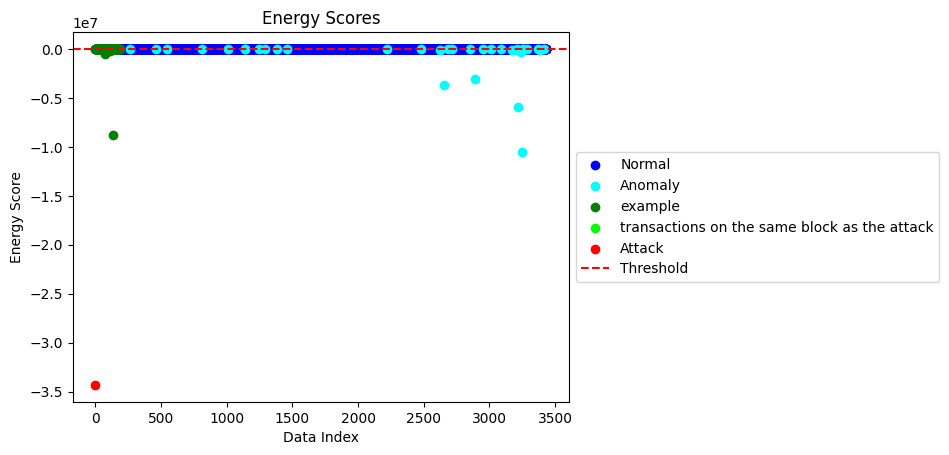

Found you
number of transactions with energy greater or equal to the attack in train is:  0  out of:  2575
number of transactions with energy greater or equal to the attack in test is:  0  out of:  859
number of transactions with energy greater or equal to the attack in example is:  0  out of:  186


In [ ]:
from sklearn import mixture



train_data, test_data = train_test_split(prep_data, test_size=0.25, random_state=40)

clf = mixture.BayesianGaussianMixture(n_components=1, covariance_type="full")
clf.fit(train_data)


# Get anomaly scores for test data
train_energy=clf.score_samples(train_data)
test_energy=clf.score_samples(test_data)
all_energy=np.concatenate((train_energy, test_energy), axis=0)

# Determine anomalies
threshold = np.percentile(all_energy, 1)
print(threshold)




normal_energy=torch.cat((torch.tensor(train_energy), torch.tensor(test_energy)), dim=0)

normal_indices = torch.where(normal_energy > threshold)[0]
anomaly_indices = torch.where(normal_energy <= threshold)[0]
attack = torch.tensor(clf.score_samples(anom.numpy()))
example = torch.tensor(clf.score_samples(exam.numpy()))

print(clf.score_samples(anom.numpy()))


plt.scatter(normal_indices, normal_energy[normal_indices], c='blue', label='Normal')
plt.scatter(anomaly_indices, normal_energy[anomaly_indices], c='cyan', label='Anomaly')
print(attack)

plt.scatter(range(len(example)), example, c='green', label='example')


plt.scatter(range(len(attack[1:3])), attack[1:3], c='lime', label='transactions on the same block as the attack')
plt.scatter(range(1), attack[0], c='red', label='Attack')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Energy Scores')
plt.xlabel('Data Index')
plt.ylabel('Energy Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

if(attack[0]<=threshold):
  print("Found you")
else:
  print("try again")


print("number of transactions with energy greater or equal to the attack in train is: ", len(torch.where(torch.tensor(train_energy) <= attack[0])[0]), " out of: ", len(train_energy))
print("number of transactions with energy greater or equal to the attack in test is: ", len(torch.where(torch.tensor(test_energy) <= attack[0])[0]), " out of: ", len(test_energy))
print("number of transactions with energy greater or equal to the attack in example is: ", len(torch.where(example <= attack[0])[0]), " out of: ", len(example))